Achmad Dhiaulhaq PYTN-KS018-019

In [3]:
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
data_criminal = pd.read_csv(r'C:\Users\Adi\Documents\codingan\data\london_crime_by_lsoa.csv')

In [5]:
data_criminal.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [6]:
data_criminal.isnull().sum().sum()

0

In [7]:
data_criminal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


### Histogram

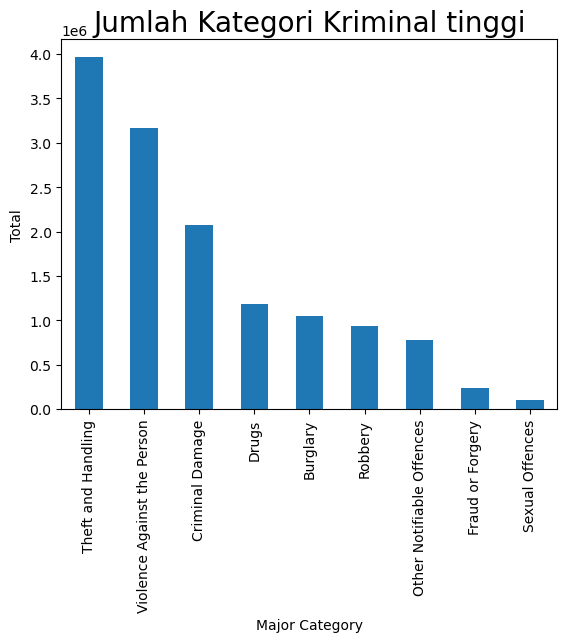

In [8]:
data_criminal['major_category'].value_counts().plot.bar()
plt.title("Jumlah Kategori Kriminal tinggi", size=20)
plt.xlabel("Major Category")
plt.ylabel("Total")
plt.show()

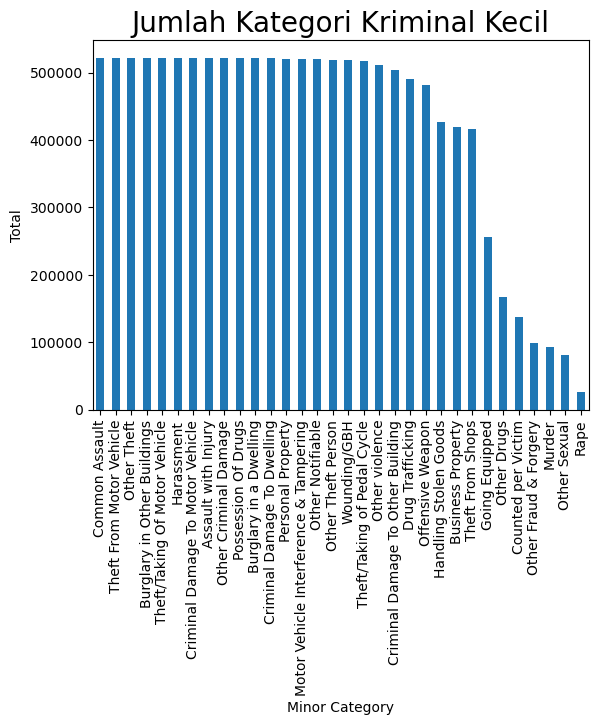

In [9]:
data_criminal['minor_category'].value_counts().plot.bar()
plt.title("Jumlah Kategori Kriminal Kecil", size=20)
plt.xlabel("Minor Category")
plt.ylabel("Total")
plt.show()

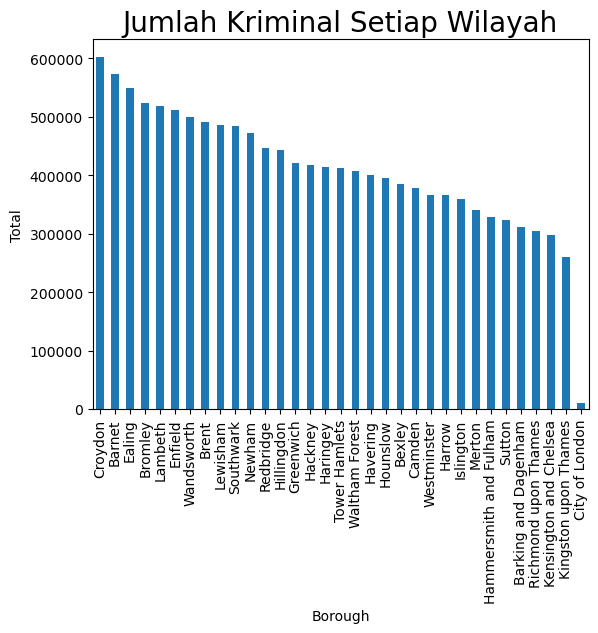

In [10]:
data_criminal['borough'].value_counts().plot.bar()
plt.title("Jumlah Kriminal Setiap Wilayah", size=20)
plt.xlabel("Borough")
plt.ylabel("Total")
plt.show()

### Kesimpulan

Dari histogram dapat disimpulkan bahwa setiap kota pada daerah London mengalami masalah tingkat kriminal yang sangat tinggi. Berdasarkan data kriminal setiap wilayah,  kota crydon memiliki tingkat kriminal yang sangat tinggi dibandingkan kota lain. Jumlah kategori kriminal tinggi lebih sedikit dibanding kriminal kecil. Pencurian dan penanganan kriminal dalam kategori kriminal utama memiliki jumlah yang sangat banyak pada kota London. Penyerangan secara seksual merupakan tingkatan terendah dari kategori kriminal utama pada kota London. Data common Assault, Theft From Motor Vehicle, other Theft, Burglary in other buildings, Theft/taking of motor vechile, assault with injury, other criminal damage, possession of drugs, bruglary in a dwelling, Criminal damage to dwelling, personal property, motor vehicle interference & tampering, other notifav;e, other theft person, wounding/GBH, dan theft/taking of pedal violence memiliki total yang sama

### Bar chart

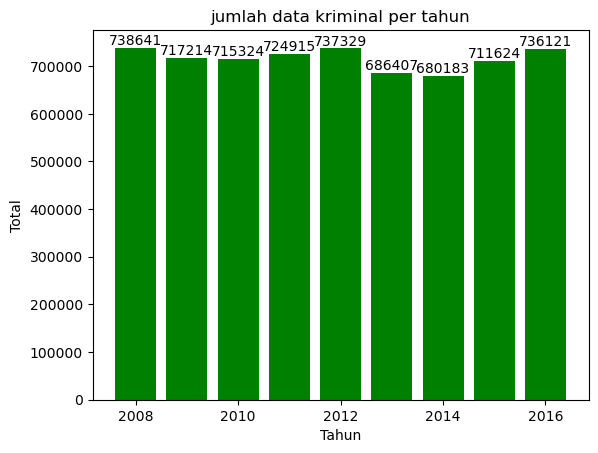

In [11]:
data_criminal_per_year = data_criminal.groupby('year')['value'].sum().reset_index()
x = data_criminal_per_year['year']
y = data_criminal_per_year['value']

plt.bar(x, y, color=['green'])
plt.title("jumlah data kriminal per tahun")
plt.xlabel('Tahun')
plt.ylabel('Total')

for i, value in enumerate(y):
    plt.text(x[i], value, str(value), ha='center', va='bottom')

plt.show()

C:\Users\Adi\AppData\Local\Temp\ipykernel_6616\3767043160.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  totals=data_criminal.groupby('major_category').sum()


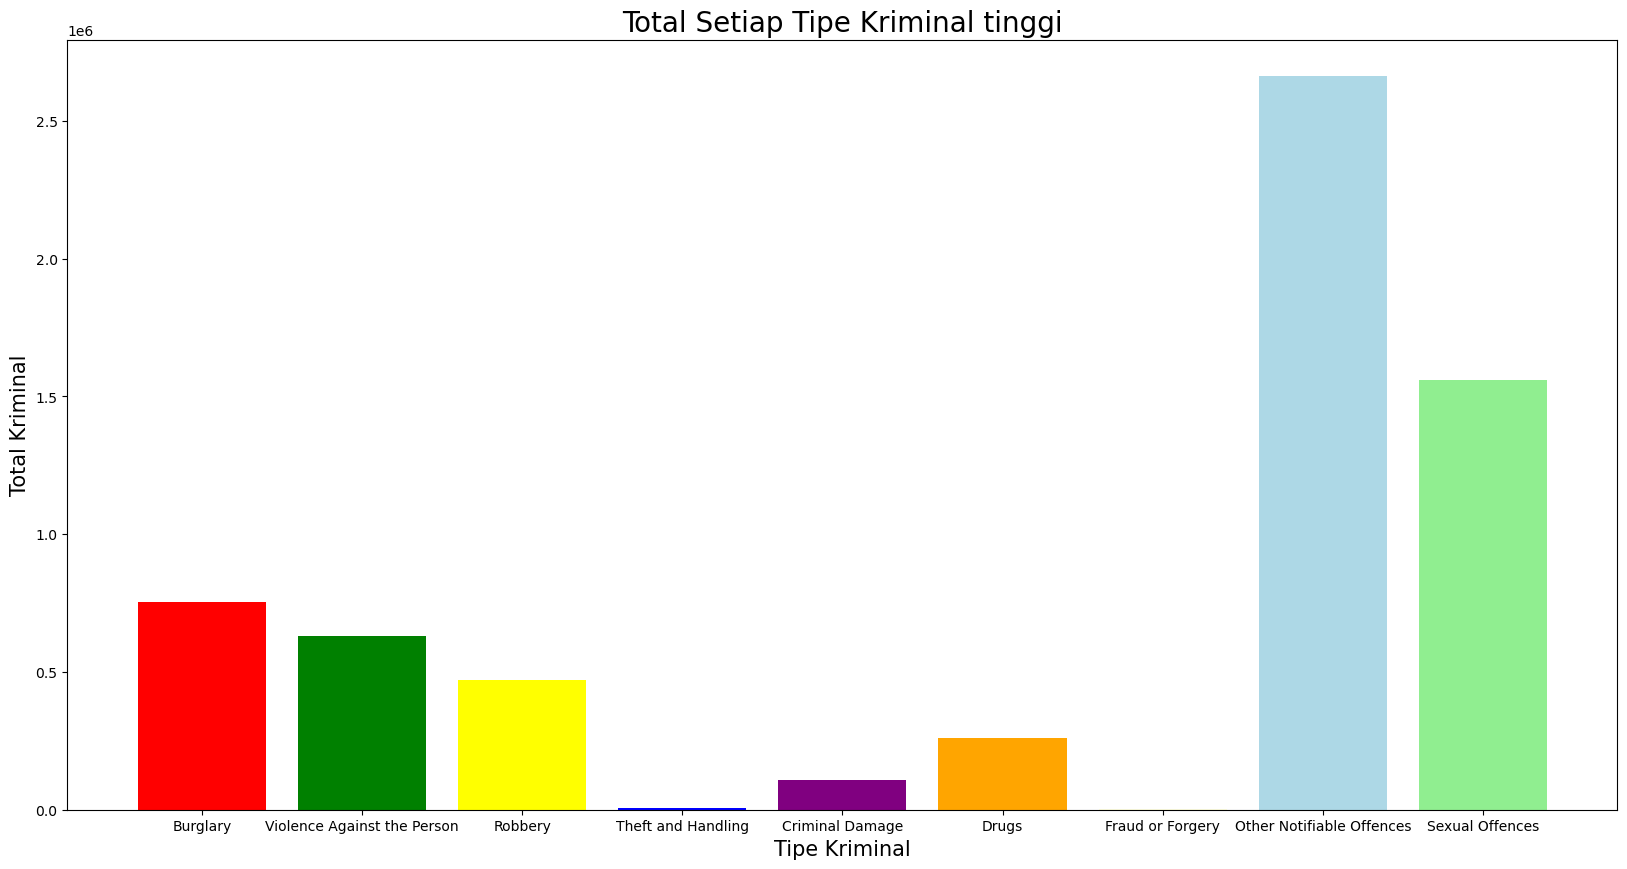

In [12]:
label=data_criminal['major_category'].unique()
pos = np.arange(len(label))
totals=data_criminal.groupby('major_category').sum()
Totals=totals['value'].to_numpy()
colors=['red','green','yellow','blue', 'purple','orange','lightyellow','lightblue','lightgreen']

plt.figure(figsize = (20, 10))
plt.bar(pos, Totals, color=colors)
plt.margins(0.05)
plt.xlabel('Tipe Kriminal', size=15)
plt.ylabel('Total Kriminal', size=15)
plt.title('Total Setiap Tipe Kriminal tinggi', size=20)
plt.xticks(pos, label)
plt.show()

C:\Users\Adi\AppData\Local\Temp\ipykernel_6616\786106375.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  totals=data_criminal.groupby('minor_category').sum()


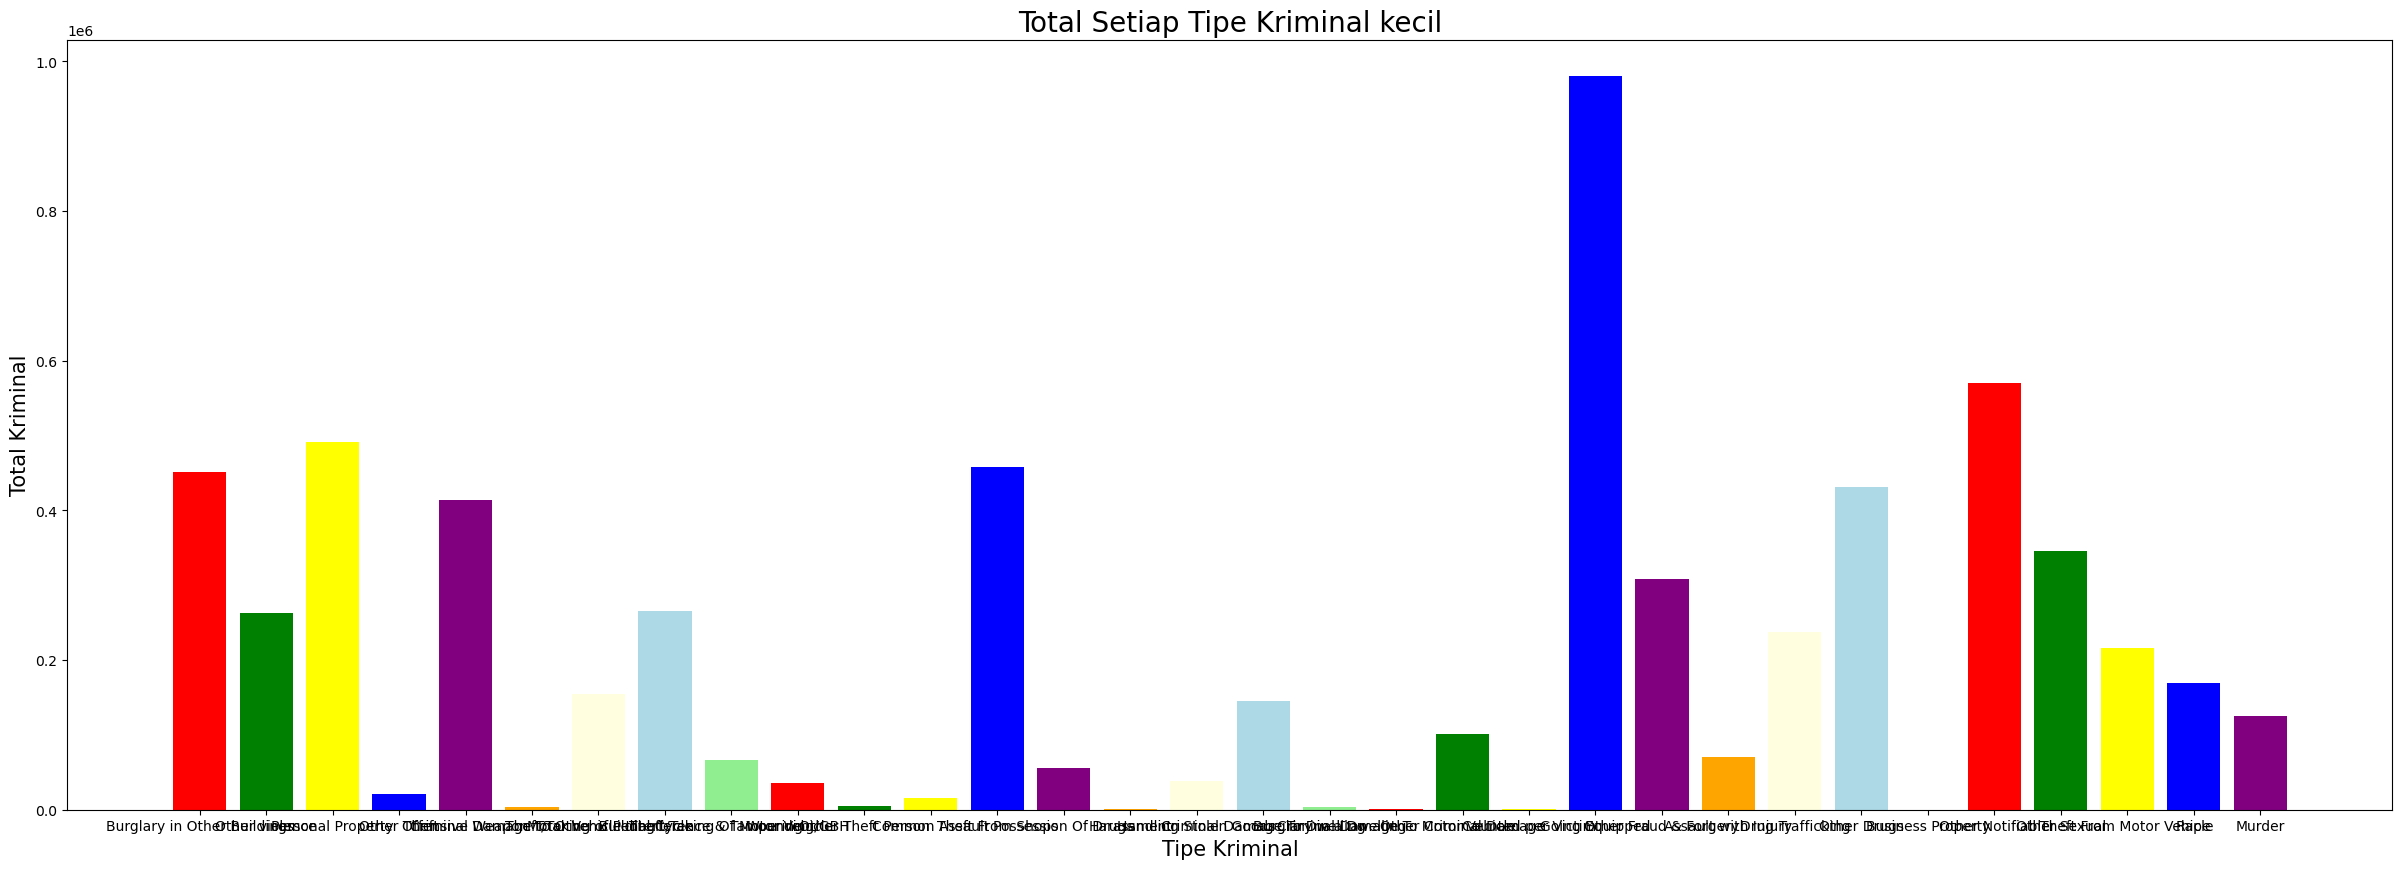

In [13]:
label=data_criminal['minor_category'].unique()
pos = np.arange(len(label))
totals=data_criminal.groupby('minor_category').sum()
Totals=totals['value'].to_numpy()
colors=['red','green','yellow','blue', 'purple','orange','lightyellow','lightblue','lightgreen']

plt.figure(figsize = (30, 10))
plt.bar(pos, Totals, color=colors)
plt.margins(0.05)
plt.xlabel('Tipe Kriminal', size=15)
plt.xticks(pos, label)
plt.ylabel('Total Kriminal', size=15)
plt.title('Total Setiap Tipe Kriminal kecil', size=20)
plt.show()

### Kesimpulan
Jumlah data tahun 2012 terbesar dari semua data dengan total 737329. Semua jumlah data kriminal per tahun data tidak memiliki selisih yang terlalu tinggi. Pada tahun 2010-2012 angka cenderung naik secara stabil. Data terendah berada pada tahun 2014 dengan jumlah data 680183. Kategori tingkat kriminal tinggi dengan total terbanyak adalah other notifiable offences. Data fraud or forgery tidak terlihat pada data Total Setiap tipe kriminal, karena memiliki nilai yang kecil. 

### Pie Chart

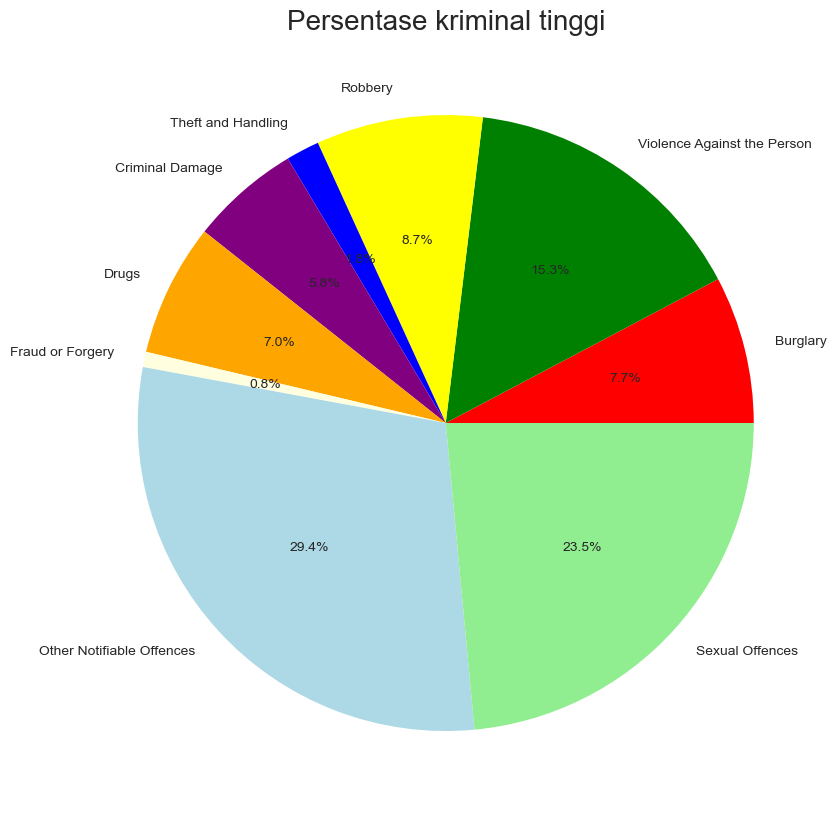

In [21]:
lables = data_criminal['major_category'].unique()
size = data_criminal.groupby(['major_category']).size()
colors=['red','green','yellow','blue', 'purple','orange','lightyellow','lightblue','lightgreen']

plt.figure(figsize = (20,10))
plt.title('Persentase kriminal tinggi', size=20)
plt.pie(size, labels = lables, colors = colors, autopct = '%1.1f%%')
plt.show()

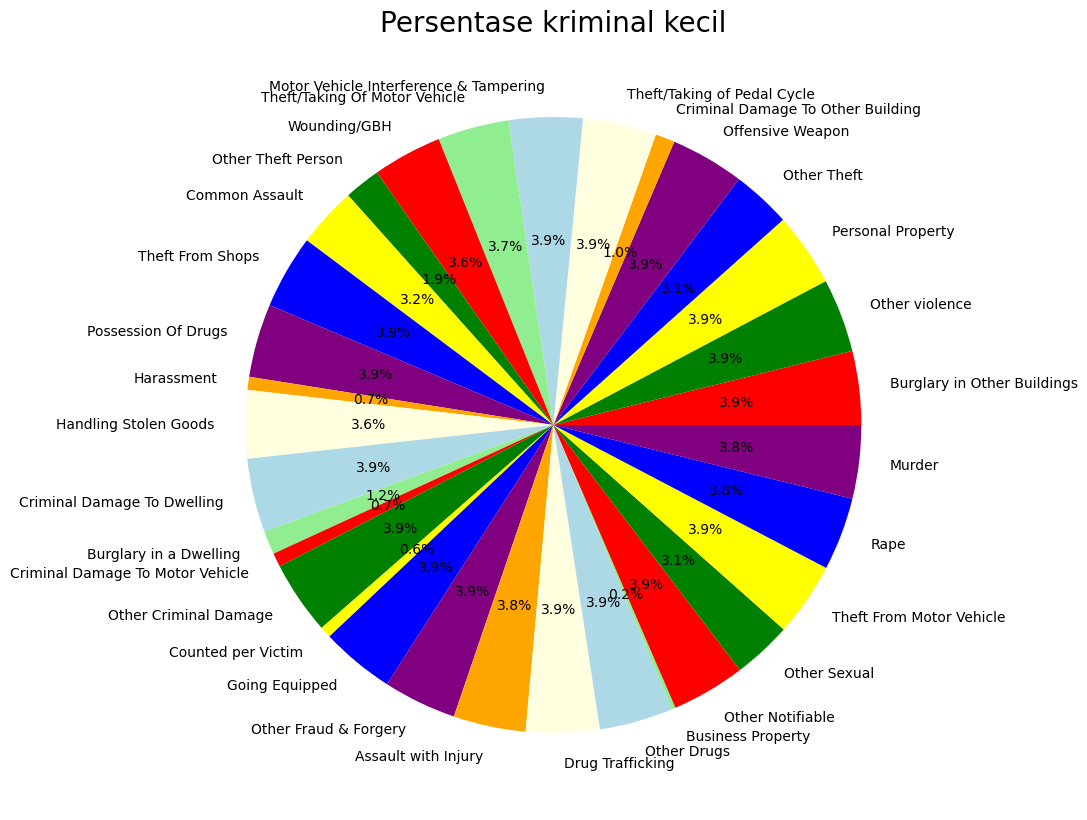

In [15]:
lables = data_criminal['minor_category'].unique()
sizes = data_criminal.groupby(['minor_category']).size()
colors=['red','green','yellow','blue', 'purple','orange','lightyellow','lightblue','lightgreen']

plt.figure(figsize = (20,10))
plt.title('Persentase kriminal kecil', size=20)
plt.pie(sizes, labels = lables, colors = colors, autopct = '%1.1f%%')
plt.show()

### Kesimpulan

Kategori kriminal tinggi didominasi oleh pelanggaran yang dilaporkan dengan 29.4 %. Urutan kedua ada penyerangan secara seksual dengan 23,5 %. Penyerangan terhadap orang lain berada di urutan ketiga dengan 15,3 %. Jumlah kriminal kecil sebesar kurang dari 4%. 

### Box Plot

C:\Users\Adi\AppData\Local\Temp\ipykernel_6616\3404476422.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


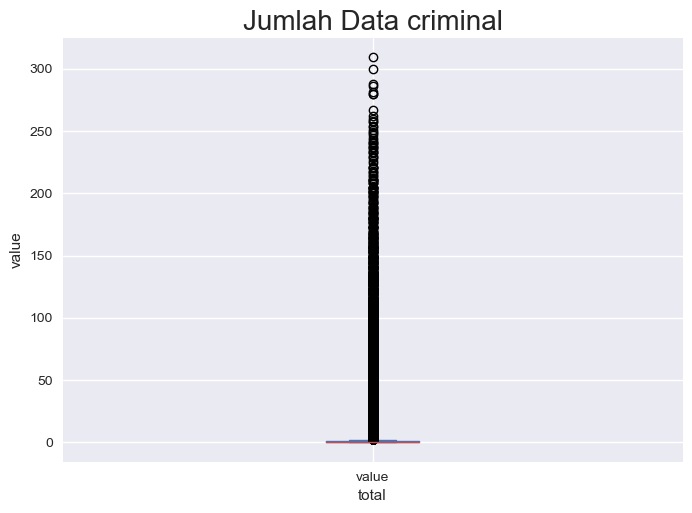

In [16]:
plt.style.use('seaborn')
data_criminal['value'].plot(kind='box')
plt.title('Jumlah Data criminal', size=20)
plt.xlabel("total")
plt.ylabel("value")
plt.grid(True)
plt.show()

### Kesimpulan
Kebanyakan data value pada boxplot bernilai 0.  Banyak pencilan pada data dengan nilai lebih dari 0. Pencilan terbesar diangka sekitar 310.

### Scatter plot

C:\Users\Adi\AppData\Local\Temp\ipykernel_6616\2314813624.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_month = data_criminal.groupby(['year']).sum()
C:\Users\Adi\AppData\Local\Temp\ipykernel_6616\2314813624.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


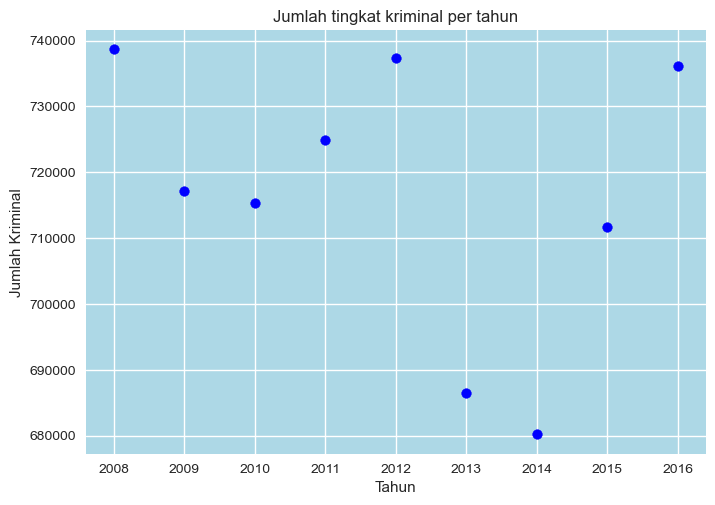

In [17]:
sum_month = data_criminal.groupby(['year']).sum()
value = sum_month['value'].to_numpy()
years = sum_month.index

plt.style.use('seaborn')
ax = plt.axes()
ax.set_facecolor("lightblue")
plt.scatter(years, value, color='blue')
plt.title('Jumlah tingkat kriminal per tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kriminal')
plt.show()

### Kesimpulan

Data scatter plot dapat disimpulkan bahwa tingkat kriminal tertinggi pada tahun 2008. Pada data scatter plot tahun 2014 kota London menjadi kota aman karena tingkat kriminal yang rendah dibanding dengan tahun yang lain.

### Word cloud

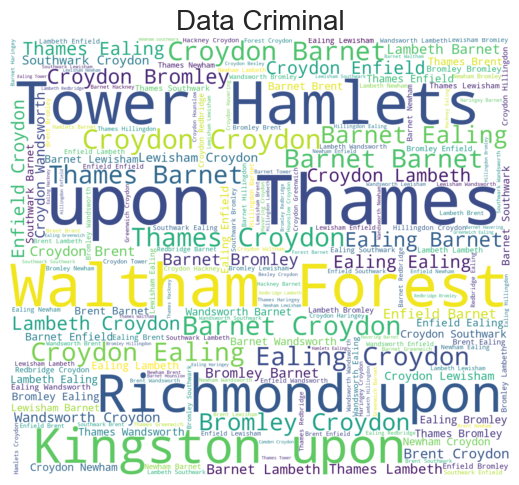

In [18]:
teks_data = ' '.join(data_criminal['borough'])

wordcloud = WordCloud(background_color='white', mode="RGB", width=1600, height=1400)
wordcloud.generate(teks_data)
plt.figure(figsize=(5,10))
plt.title('Data Criminal', size=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Folium map

In [19]:
london=r"C:\Users\Adi\Documents\codingan\data\london_boroughs.geojson"
london_location = [51.507222, -0.1275]
london_map = folium.Map(location=london_location, zoom_start=10)
folium.Choropleth(geo_data=london,
                  data=data_criminal,
                  columns=['borough', 'value'],
                  key_on='feature.properties.name',
                  fill_color='YlOrRd',
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  legend_name="Tingkat Kriminal Setiap Wilayah").add_to(london_map)
london_map

### Lineplot

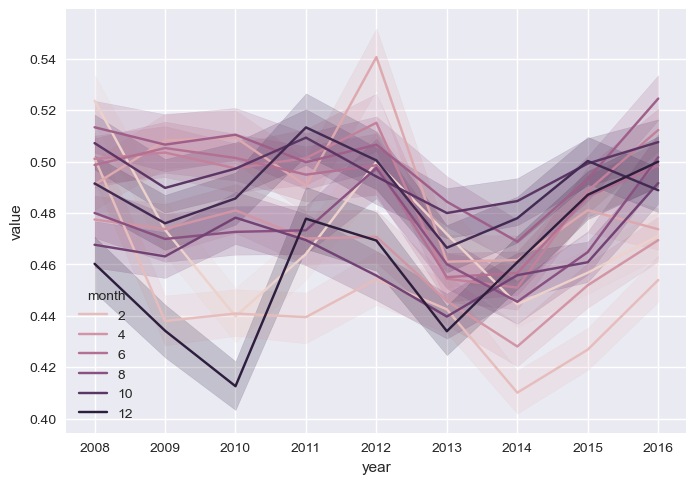

In [20]:
sns.lineplot(data=data_criminal, x="year", y="value", hue="month")
plt.show()

### Kesimpulan Seluruh data

Kesimpulan dari seluruh data tingkat kriminalitas pada kota london sangat tinggi.  Data kriminal didominasi oleh pencurian, penyerangan terhadap kendaraan, dan penyerangan terhadap orang lain. Hal ini disebabkan karena masalah ekonomi pada kota london pada tahun 2008-2016. Kota london mengalami masalah kriminal tertinggi pada tahun 2008, 2012, dan 2016. Terjadi penurunan tingkat kriminal dari tahun 2012 ke tahun 2013. Penurunan secara drastis ini disebabkan karena tingkat kriminal yang rendah pada tahun 2013. Data value benilai 0 merupakan data terbanyak pada kolom value. Data value 0 berarti tidak ada tindak kriminal. Dari pie chart dapat disimpulkan bahwa pelanggaran atau kriminal kebanyakan masih diproses atau diselidiki. Untuk penyerangan secara seksual berada diurutan kedua karena dapat diidentifikasi dengan cepat. Jenis kriminal lain dengan presentasi kurang dari 10% disebabkan karena sulit untuk melacak seseorang dan mengidentifikasi jenis kasus oleh kepolisian.  